# 3 Exploratory Data Analysis (EDA)

## 3.1 Contents
## 3.2 Introduction
## 3.3 Imports
## 3.4 Load Data 
## 3.5 Data Exploration
        3.5.1 Conversion & Time Plot 
        3.5.2 Seasonal Plot
        3.5.3 Time Series Decomposition
## 3.6 Save File
## 3.7 Summary

## 3.2 Introduction

After completing the data wrangling of the Historical Sales Data dataset, it is now time to examine the target variable *ContractDate* and the total sales observed within this time period. Once a time plot is graphed it will be examined for consistent patterns? If there is a significant trend? If seasonality is important? If there is evidence of the presence of business cycles? Are there any outliers in the data that need to be explained by those with expert knowledge? How strong are the relationships among the variables available for analysis? 

## 3.3 Imports

In [1]:
from pandas import read_csv
from pandas import datetime
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from pylab import rcParams
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

<ipython-input-1-12d895fdda84>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


## 3.4 Load Data

In [2]:
#csv file in subdirectory 'interim'  
shc = read_csv('../data/interim/Sales_Hist_Clean.csv')
shc

,DealNumber,ContractDate,InventoryType,VIN,VehicleMake,VehicleModel,VehicleModelYear,VehicleSalePrice,TotalGrossProfit,BackEndGrossProfit,...,BuyerHomeAddressState,BuyerHomeAddressPostalCode,Trade1_VIN,Trade1_Year,Trade1_Make,Trade1_Model,Trade2_VIN,Trade2_Year,Trade2_Make,Trade2_Model
0,10029,2011-01-12,U,2T2HK31U49C118454,Lexus,RX 350,2009,36500.0,4985.75,200.00,...,DE,199704516,YV1CM59H331013308,2003.0,Volvo,XC90,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1,10035,2011-01-10,U,JTHCE96S580017706,Lexus,GS 350,2008,34995.0,3028.39,0.00,...,IN,466149383,1FTWW31P95EB23344,2005.0,Ford,F-350,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2,10036,2011-01-11,N,JTHDL5EF0B5003231,Lexus,LS 460,2011,82150.0,6481.00,0.00,...,IN,465061850,JTHBL46F385052674,2008.0,Lexus,LS 460,Not Applicable,Not Applicable,Not Applicable,Not Applicable
3,10037,2011-01-14,N,JTJBK1BA2B2013626,Lexus,RX 350,2011,42921.0,3087.00,0.00,...,IN,465308309,1HGCD5666SA119678,1995.0,Honda,Accord,Not Applicable,Not Applicable,Not Applicable,Not Applicable
4,10057,2011-01-14,U,JTJHK31U082048420,Lexus,RX 350,2008,31888.0,3461.87,0.00,...,IN,465146138,1FMDU34X1VUC98892,1997.0,Ford,Explorer,Not Applicable,Not Applicable,Not Applicable,Not Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8203,9855,2010-12-31,U,JTHBJ46G582238457,Lexus,ES 350,2008,24500.0,617.71,639.60,...,IN,465618879,JHLRE48747C075135,2007.0,Honda,CR-V,Not Applicable,Not Applicable,Not Applicable,Not Applicable
8204,9857,2010-12-31,U,2T2HA31U06C096127,Lexus,RX 330,2006,23600.0,2916.00,0.00,...,IN,466151140,JTJHF10U830298468,2003.0,Lexus,RX 300,WDBNG75J51A173941,2001.0,Mercedes-Benz,S500
8205,9859,2010-12-31,N,2T2BK1BA1BC088155,Lexus,RX 350,2011,41821.0,2139.60,252.60,...,IN,465307865,JT6HF10U1Y0126767,2000.0,Lexus,RX 300,Not Applicable,Not Applicable,Not Applicable,Not Applicable
8206,989,2006-08-31,U,2T2HA31U15C080582,Lexus,RX 330,2005,34500.0,2928.22,446.85,...,IN,465307078,1G4CW54K724194862,2002.0,Buick,Park Avenue,Not Applicable,Not Applicable,Not Applicable,Not Applicable


## 3.5 Data Exploration

#### 3.5.1 Conversion & Time Plot 

In [3]:
#break out year and month data
shc['ContractDate'] = pd.to_datetime(shc['ContractDate'])
shc['ContractYearMonth'] = shc['ContractDate'].dt.strftime('%Y-%m')
shc.head(20)

,DealNumber,ContractDate,InventoryType,VIN,VehicleMake,VehicleModel,VehicleModelYear,VehicleSalePrice,TotalGrossProfit,BackEndGrossProfit,...,BuyerHomeAddressPostalCode,Trade1_VIN,Trade1_Year,Trade1_Make,Trade1_Model,Trade2_VIN,Trade2_Year,Trade2_Make,Trade2_Model,ContractYearMonth
0,10029,2011-01-12,U,2T2HK31U49C118454,Lexus,RX 350,2009,36500.00,4985.75,200.00,...,199704516,YV1CM59H331013308,2003.0,Volvo,XC90,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
1,10035,2011-01-10,U,JTHCE96S580017706,Lexus,GS 350,2008,34995.00,3028.39,0.00,...,466149383,1FTWW31P95EB23344,2005.0,Ford,F-350,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
2,10036,2011-01-11,N,JTHDL5EF0B5003231,Lexus,LS 460,2011,82150.00,6481.00,0.00,...,465061850,JTHBL46F385052674,2008.0,Lexus,LS 460,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
3,10037,2011-01-14,N,JTJBK1BA2B2013626,Lexus,RX 350,2011,42921.00,3087.00,0.00,...,465308309,1HGCD5666SA119678,1995.0,Honda,Accord,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
4,10057,2011-01-14,U,JTJHK31U082048420,Lexus,RX 350,2008,31888.00,3461.87,0.00,...,465146138,1FMDU34X1VUC98892,1997.0,Ford,Explorer,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
5,10059,2011-01-14,U,1NXBR32E55Z545986,Toyota,Corolla,2005,10719.00,3755.17,0.00,...,465146068,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
6,10060,2011-01-14,N,2T2BK1BA7BC087463,Lexus,RX 350,2011,45921.00,2157.19,241.48,...,490853438,2T2HK31U08C049602,2008.0,Lexus,RX 350,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
7,10067,2011-01-17,U,JTHBL46F385052674,Lexus,LS 460,2008,43995.00,5988.73,612.36,...,46390,JTHCE96S570011550,2007.0,Lexus,GS 350,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
8,10068,2011-01-17,U,JTJBT20X780158790,Lexus,GX 470,2008,42000.00,4825.26,150.00,...,491128449,WA1EY74L57D059909,2007.0,Audi,Q7,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
9,10072,2011-01-18,U,2T2HA31U36C108786,Lexus,RX 330,2006,26995.00,4128.71,508.05,...,466141605,3N1CB51D94L836617,2004.0,Nissan,Sentra,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01


In [4]:
#Grouping and perform count over each time period of sales
year_mnth_num = shc.groupby('ContractYearMonth')['ContractYearMonth'].count()
print(year_mnth_num)

ContractYearMonth
2004-06    53
2004-07    53
2004-08    79
2004-09    64
2004-10    81
           ..
2016-11    37
2016-12    52
2017-01    36
2017-02    33
2017-03    45
Name: ContractYearMonth, Length: 154, dtype: int64


In [5]:
#save as new df of total sales
df_total_sales = pd.DataFrame(year_mnth_num.reset_index(name = "TotalSales"))
df_total_sales

,ContractYearMonth,TotalSales
0,2004-06,53
1,2004-07,53
2,2004-08,79
3,2004-09,64
4,2004-10,81
...,...,...
149,2016-11,37
150,2016-12,52
151,2017-01,36
152,2017-02,33


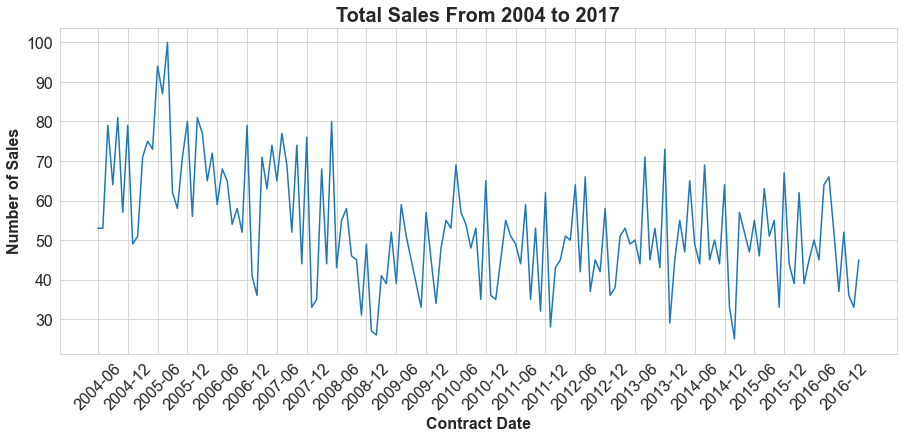

In [6]:
#graph time plot of data to examine vehicle sales yearly/monthly
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(df_total_sales['ContractYearMonth'], df_total_sales['TotalSales'])
x_ticks = np.arange(0,153,6) #start at index 0, stop at 153, and step up by 6
plt.xticks(x_ticks, rotation = 45)

ax.set_title('Total Sales From 2004 to 2017', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Contract Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Number of Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

The time plot of overall sells shows strong seasonality within each year, as well as some strong cyclic behavior with a period of about 2–4 years. There is a downward trend in the data beginning mid to late 2007.

In addition, 2005 appears to have outliers and values which need to be explained because they differ from the seasonality or trend of any other year. There are missing observations from January to May of 2004 and April of 2017 and onward. Also there is a clear decreasing fluctuation in 2008, which is also during the last year of financial crisis of 2007-2008 in the United States, and again in 2014.

#### 3.5.2 Seasonal Plot

In [7]:
#prepare for seasonal plot by seperating month and year of ContractDate
df_ts_yr_mnth = df_total_sales.copy()
df_ts_yr_mnth['ContractYearMonth'] = pd.to_datetime(df_ts_yr_mnth['ContractYearMonth'])
df_ts_yr_mnth['ContractYear'] = df_ts_yr_mnth['ContractYearMonth'].dt.year
df_ts_yr_mnth['ContractMonth'] = df_ts_yr_mnth['ContractYearMonth'].dt.month
df_ts_yr_mnth

,ContractYearMonth,TotalSales,ContractYear,ContractMonth
0,2004-06-01,53,2004,6
1,2004-07-01,53,2004,7
2,2004-08-01,79,2004,8
3,2004-09-01,64,2004,9
4,2004-10-01,81,2004,10
...,...,...,...,...
149,2016-11-01,37,2016,11
150,2016-12-01,52,2016,12
151,2017-01-01,36,2017,1
152,2017-02-01,33,2017,2


Text(0, 0.5, 'Number of Sales')

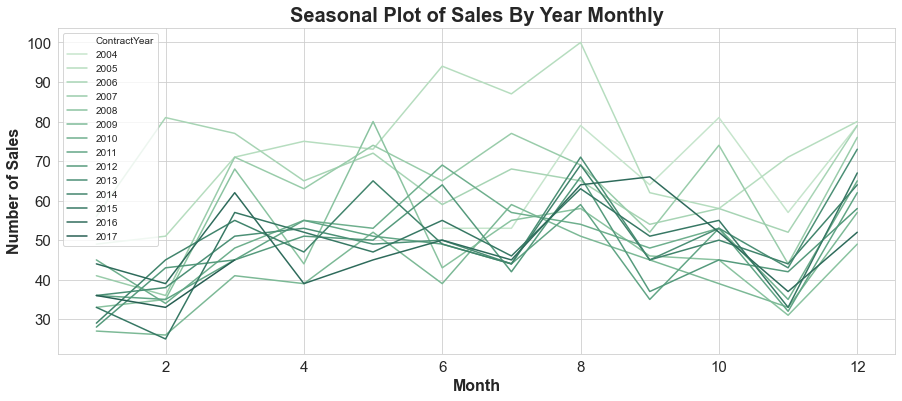

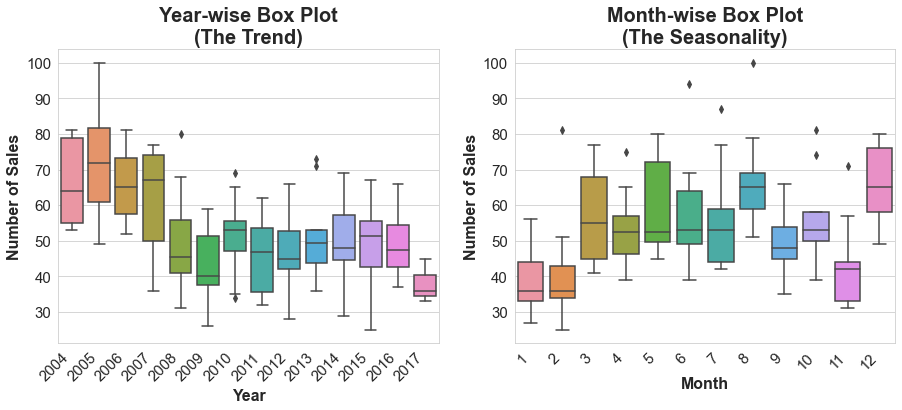

In [8]:
#seasonal plot of total sales
variable = 'TotalSales'
fig, ax = plt.subplots(figsize=(15, 6))
#line plot
palette = sns.color_palette("ch:2.5,-.2,dark=.3", 14)#14 refers to the number of years plotted
sns.lineplot(df_ts_yr_mnth['ContractMonth'], df_ts_yr_mnth[variable], hue=df_ts_yr_mnth['ContractYear'], palette=palette)
ax.set_title('Seasonal Plot of Sales By Year Monthly', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Number of Sales', fontsize = 16, fontdict=dict(weight='bold'))
#boxplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.autofmt_xdate(rotation=45) #auto rotates all x_tick labels 45 degrees
#yearly plot
sns.boxplot(df_ts_yr_mnth['ContractYear'], df_ts_yr_mnth[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Number of Sales', fontsize = 16, fontdict=dict(weight='bold'))
#monthly plot
sns.boxplot(df_ts_yr_mnth['ContractMonth'], df_ts_yr_mnth[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Number of Sales', fontsize = 16, fontdict=dict(weight='bold'))

In the seasonal plot there is a clear pattern of seasonal trend occuring every two months. March, August, and December are typically in increasing fluctuantion, while February, September, November are always in decreasing fluctation. As early as March Lexus dealerships begin to receive the new models for the year. August is the start of the new school year for many high schools and universities where a student vehicle is typical. Lastly, December is the month of Lexus' largest sales campaign, 'December to Remember'. These may be reasons why sales are typically in an increasing fluctuation during these months. February is a short month which could effect number of selling days for the sales team and consumers are spending their money on Valentine's Day gifts. September is the first month after the summer months when people vacation and after the school year has begun. November is in the same month as one of the most expensive holidays, Thanksgiving. For these reasons this may be why a decreasing fluctuation is typical for these months. 

In the trend box plot for the year-wise clear outliers can be seen in 2008, 2010, and 2013. Overall, it appears sales from 2004 to 2007 typical fall between 35 to 85 units sold, except for in 2005, where total sells exceed the typical range as observed in this cyclical pattern. 2008 is the beginning of a new cyclical pattern that appears to last 2 years with a staggering decrease in total unit sells between 25 to the high 60s. Curious to know if the outlier in 2008 at 80 units was in the first quarter of the year. There is a increase in sales in 2010, but then a return to cyclical pattern started in 2008 with sales ranging between 25 to high 60s for the remaing 5 years of data.

In the seasonality box plot for the month-wise there outliers in February(2), April(4), June(6), July(7), August(8), October(10), and November(11). January(1) and February(2) typically have the lowest total sales, with Febraury as the lowest and December has the highest. From this plot, we now know the outlier we see in February occurred somwhere between 2004 to 2007, the outliers we see for June through August, belong to 2005, and the outliers for October and November occured between 2004 to 2007 or in 2013.

#### 3.5.3 Time Series Decomposition

Since the historical sales data above has a non-linear seasonality, meaning there were increasing and decreasing frequencies over time, a multiplicative model is appropriate when a decomposition method is applied, especially with economic time series. The seasonal_decompose() method from statsmodels library will be applied. This method decomposes a time series into trend, seasonality and noise.

In [2]:
#convert ContractYearMonth to a pandas DatetimeIndex
df_total_sales['ContractYearMonth'] = pd.to_datetime(df_total_sales['ContractYearMonth'])
#remove days from date
df_total_sales['ContractYearMonth'] = df_total_sales['ContractYearMonth'].dt.strftime('%Y-%m')
df_total_sales = df_total_sales.set_index('ContractYearMonth')

NameError: name 'pd' is not defined

In [ ]:
#multiplicative model decomposition plot
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16
decomposition = sm.tsa.seasonal_decompose(df_total_sales, model='multiplicative')
decomp = decomposition.plot()
decomp.suptitle('Total Sales Decomposition', fontsize=22)

In the first plot we see again the time plot created earlier in section 3.5.1. Next, is a plot of the trend. We can see a downward trend beginning in 2005 through 2009. Then a climbing and dropping frequency that occurs every two years between 2010 through 2016. The seasonal plot shows there is a pattern that occurs every two years and the residual plot shows high variance in the early and late years.

## 3.6 Save File

In [1]:
#save time series dataframe with singular DateTime column in CSV format
df_total_sales.to_csv('../data/processed/TotalSales.csv')

NameError: name 'df_total_sales' is not defined

## 3.7 Summary

The time series dataframe has been saved as a CSV file titled "TotalSales". It can be concluded that this time series is not stationary and will require differencing to make it stationary, at least a difference order of 1. Examining the mean value and autocorrelation function (ACF) in the next step will help as well. 